# PyTorch Computer Vision

* See reference [notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb)
* See reference [online book](https://www.learnpytorch.io/03_pytorch_computer_vision/)

## 0. Computer vision libraries in PyTorch

* [`torchvision`](https://pytorch.org/vision/stable/index.html) - base domain library for PyTorch omputer sision
* `torchvision.datasets` - get datasets and data loadning functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check out version
print(torch.__version__)
print(torchvision.__version__)

1.13.0+cu117
0.14.0+cu117


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(root='data',  # where to download data to?
                                   train=True,  # do we want the training dataset?
                                   download=True,  # do we want to download yes/no?
                                   transform=ToTensor(),  # how do we want to transform the data?
                                   target_transform=None)  # how do we want to transform the labels/targets?

test_data = datasets.FashionMNIST(root='data',
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, weight]
Image lable: Ankle boot


(-0.5, 27.5, 27.5, -0.5)

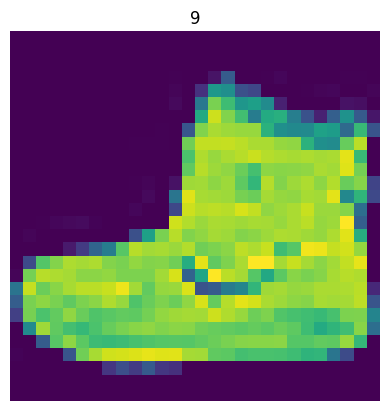

In [8]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, weight]")
print(f"Image lable: {class_names[label]}")
plt.imshow(image.squeeze())  # squeeze() -> remove the singular dimension
plt.title(label)
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

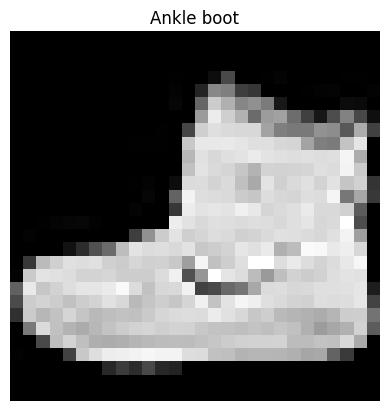

In [9]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

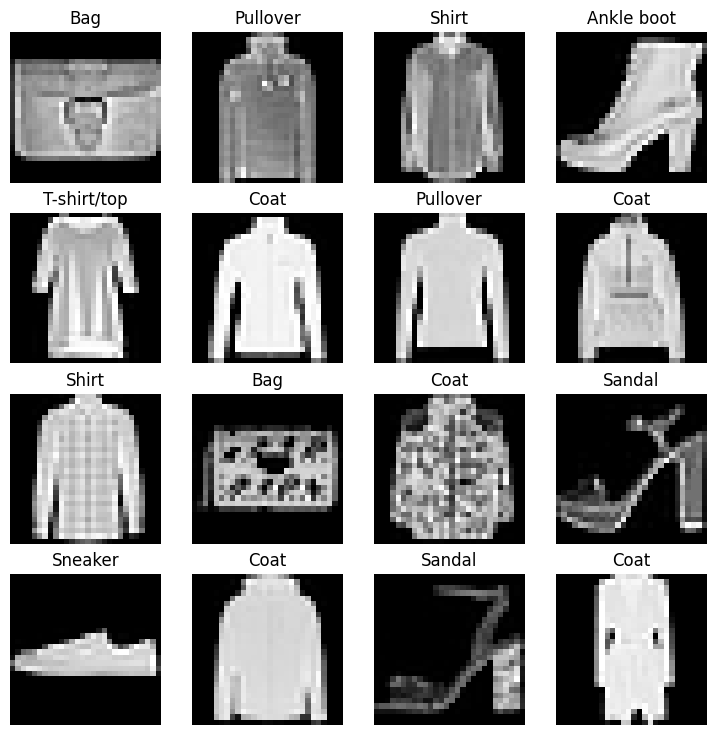

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, columns = 4, 4

for i in range(1, rows*columns+1):
    random_idx = torch.randint(1, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled pure linear lines? Or do you think we'll need non-linearities?

## 2. Prepare DataLoader

Right now, our data is in form of PyTorch Datasets.

DataLoader turns our dataset into Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It give our neural network more chances to update its gradients per epoch.

For more on mini-batches, see here: https://www.youtube.com/watch?v=4qJaSmvhxi8

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1cb343b1660>,
 <torch.utils.data.dataloader.DataLoader at 0x1cb343b1540>)

In [12]:
# Let's check out what we've created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batch of {BATCH_SIZE}.')
print(f'Length of test_dataloader: {len(test_dataloader)} batch of {BATCH_SIZE}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001CB343B1660>, <torch.utils.data.dataloader.DataLoader object at 0x000001CB343B1540>)
Length of train_dataloader: 1875 batch of 32.
Length of test_dataloader: 313 batch of 32


In [13]:
# Check out what's inside the training dataloader
train_features_batch, test_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, test_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


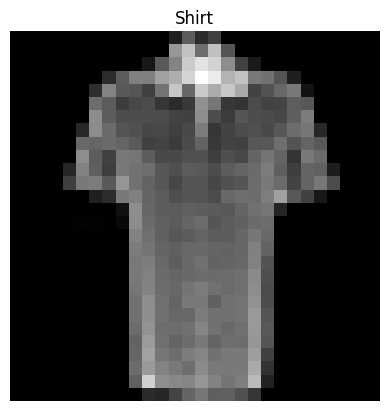

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], test_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[random_idx])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a sample model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [15]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)  # perform forward pass

# Print out what happend
print(f'Shape before flattening: {x.shape} -> [color_channel, height, weight]')
print(f'Shape after flattening: {output.shape} -> [color_channel, height*weight]')

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channel, height, weight]
Shape after flattening: torch.Size([1, 784]) -> [color_channel, height*weight]


In [16]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int,
                 ) -> None:
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [17]:
from torchinfo import summary

torch.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'


# Setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784,  # 28 * 28
                              hidden_units=10,  # how many units in the hidden layer
                              output_shape=len(class_names)  # one for every class
                              ).to(device)

summary(model_0, input_size=train_features_batch.shape, col_names=['input_size', 'output_size', 'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
FashionMNISTModelV0                      [32, 1, 28, 28]           [32, 10]                  --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 10]                  --
│    └─Flatten: 2-1                      [32, 1, 28, 28]           [32, 784]                 --
│    └─Linear: 2-2                       [32, 784]                 [32, 10]                  7,850
│    └─Linear: 2-3                       [32, 10]                  [32, 10]                  110
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.14

In [18]:
device = 'cpu'
model_0.to(device)
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.1984,  0.3088,  0.3309, -0.1457,  0.4952,  0.1075,  0.3163,  0.3718,
         -0.1749, -0.0473]], grad_fn=<AddmmBackward0>)

### 3.1 Setup the loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working with classification problem, let's use accuracy as our evaluation metric

In [19]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo
if Path('helper_function.py').is_file():
    print('helper_function.py already exists, skipping download...')
else:
    print('Downloading helper_function.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

    with open('helper_function.py', 'wb') as f:
        f.write(request.content)

helper_function.py already exists, skipping download...


In [20]:
# Import accuracy metrics
from helper_function import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=.1)

### 3.2 Creating a function to time our experiments

Maching learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast its run

In [21]:
from timeit import default_timer as timer


def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Print difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds.")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

1.  Loop through epochs.
2.  Loop through training batches, perform training steps, calculate the train loss *per batch*
3.  Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4.  Print out what's happenin'
5.  Time it all (for fun)

In [22]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n------')

    # Training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0.forward(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss  # accumulate train loss

        # 3. Zero gradient
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happenin'
        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    # Testing
    with torch.inference_mode():
        test_loss, test_acc = 0, 0
        model_0.eval()

        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss/acc average per batch
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # Print out what's happenin'
    print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

# Calcuate the trainging time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.


Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 17.685 seconds.


## 4. Make predictions and get Model 0 results

In [23]:
torch.manual_seed(42)


def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0

    with torch.inference_mode():
        model.eval()

        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name': model.__class__.__name__,  # only work when model was created with a class
            'model_loss': f'{loss.item():.5f}',
            'model_acc': f'{acc:.2f}%'}


# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': '0.47664',
 'model_acc': '83.43%'}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We learn about the power about non-linearity in [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity)

In [25]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int,
                 ) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten image into single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [26]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,  # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)  # send to GPU if it's available

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [27]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()  # Measure how our model is tries to update our model's parameters to reduce the loss

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [28]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Perform a training loop with model trying to learn on data_loader."""

    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):

        # Put data on target device
        X, y = map(lambda x: x.to(device), [X, y])

        # 1. Forward pass (output the raw logits from the model)
        y_pred = model.forward(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss  # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))  # go from logits -> prediction labels

        # 3. Zero gradient
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%')

In [29]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss: torch.nn.Module,
              accuracy,
              device: torch.device = device):
    """Perform a testing loop step on model going over data_loader."""

    test_loss, test_acc = 0, 0

    # Put model in eval mode
    model.eval()

    # Trun on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send the data to the target device
            X, y = map(lambda x: x.to(device), [X, y])

            # Forward pass
            test_pred = model(X)

            # Calculate the loss
            test_loss += loss(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))  # go from logits -> prediction labels

        # Adjust metrics and print it
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss: .5f}, | Test acc: {test_acc:.2f}%\n')

In [32]:
from timeit import default_timer as timer
torch.manual_seed(42)

# Measure time

train_time_start_on_gpu = timer()

# Set the epochs
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n---------')

    # training function
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_end_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train acc: 61.34%
Test loss:  0.95636, | Test acc: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train acc: 71.93%
Test loss:  0.72227, | Test acc: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train acc: 75.94%
Test loss:  0.68500, | Test acc: 75.02%

Train time on cuda: 0.000 seconds.


**Note:** Sometimes, depending on your data/hardware you might find your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for coping data/model to and from the GPU outweights the compute benefits offered by GPU.
2. The hardware you're using has a better CPU in terms compute capability than the GPU.

For more on how to make your models compute, see here: https://horace.io/brrr_intro.html

In [31]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': '0.47664',
 'model_acc': '83.43%'}